In [1]:
#Import libraries
import math
import pandas as pd
import numpy as np
import os
import tensorflow_decision_forests as tfdf
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


# import tensorflow as tf  # acts as the framework upon which this model is built
import numpy as np  # basic scientific computation
import pandas as pd #for data science
import scipy
import matplotlib.pyplot as plt #ploting 
import seaborn as sns
sns.set_style('darkgrid')  # ploting
my_dpi=96 #dots per inch. Used in the size of the plots
 
import csv #library for handling csv files 




In [2]:
df = pd.read_csv('bank/bank-full.csv', sep=';')

# print(df.isna().sum())

# Group age by percentages of 10
labels = [0] + [f'{i+10}' for i in range(10, 100, 10)]
df['age_groups'] = pd.qcut(df['age'], 10, labels=labels)
df.age_groups = df.age_groups.astype("int")
# print(df[['age', 'age_groups']])


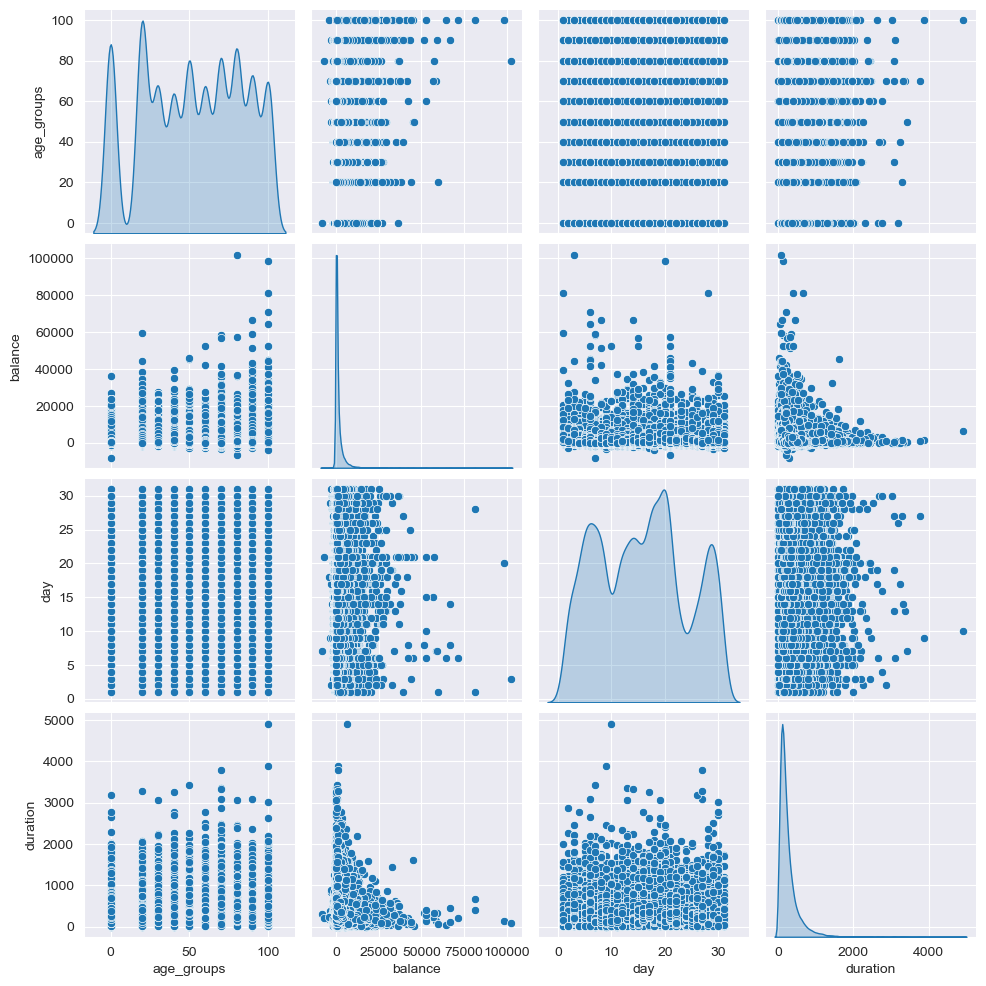

In [3]:
sns.pairplot(df[['age_groups', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration']], diag_kind='kde')


In [4]:

# Switch all categorical vallues to numerical
df.job = df.job.replace(["admin.", "unknown", "unemployed", "management", "housemaid", "entrepreneur", "student", "blue-collar", "self-employed", "retired", "technician", "services"], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
df = pd.get_dummies(df, columns=['job'], prefix='job', prefix_sep='')


df.marital = df.marital.replace(["married", "divorced", "single"], [1, 2, 3])
df = pd.get_dummies(df, columns=['marital'], prefix='marital', prefix_sep='')

df.education = df.education.replace(
    ["unknown", "secondary", "primary", "tertiary"], [1, 2, 3, 4])
df = pd.get_dummies(df, columns=['education'], prefix='education', prefix_sep='')

df.default = df.default.replace(["yes", "no"], [1, 2])
df = pd.get_dummies(df, columns=['default'], prefix='default', prefix_sep='')

df.housing = df.housing.replace(["yes", "no"], [1, 2])
df = pd.get_dummies(df, columns=['housing'], prefix='housing', prefix_sep='')

df.loan = df.loan.replace(["yes", "no"], [1, 2])
df = pd.get_dummies(df, columns=['loan'], prefix='loan', prefix_sep='')

df.contact = df.contact.replace(
    ["unknown", "telephone", "cellular"], [1, 2, 3])
df = pd.get_dummies(df, columns=['contact'], prefix='contact', prefix_sep='')

df.month = df.month.replace(["jan", "feb", "mar", "apr", "may", "jun", "jul",
                            "aug", "sep", "oct", "nov", "dec"], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
# df = pd.get_dummies(df, columns=['month'], prefix='month', prefix_sep='')

df.poutcome = df.poutcome.replace(
    ["unknown", "other", "failure", "success"], [2, 3, 0, 1])
df = pd.get_dummies(df, columns=['poutcome'], prefix='poutcome', prefix_sep='')

df.y = df.y.replace(["yes", "no"], [1, 0])
# df = pd.get_dummies(df, columns=['y'], prefix='y', prefix_sep='')



# print(df.isna().sum())

In [5]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)


In [6]:
train_dataset.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
age,36169.0,40.953994,10.615734,18.0,33.0,39.0,48.0,95.0
balance,36169.0,1349.234814,3008.088569,-6847.0,72.0,443.0,1411.0,102127.0
day,36169.0,15.791894,8.337456,1.0,8.0,16.0,21.0,31.0
month,36169.0,6.134148,2.404704,1.0,5.0,6.0,8.0,12.0
duration,36169.0,258.097321,256.995107,0.0,103.0,181.0,319.0,4918.0
campaign,36169.0,2.770522,3.110937,1.0,1.0,2.0,3.0,63.0
pdays,36169.0,40.141392,99.848183,-1.0,-1.0,-1.0,-1.0,850.0
previous,36169.0,0.582405,2.402205,0.0,0.0,0.0,0.0,275.0
y,36169.0,0.116564,0.320904,0.0,0.0,0.0,0.0,1.0
age_groups,36169.0,52.317731,31.117844,0.0,30.0,50.0,80.0,100.0


In [7]:
# Correlation of variables.
# df.corr()

In [8]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('y')
test_labels = test_features.pop('y')
